1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


2. Load Training Dataset

In [2]:
# Upload viva_train_dataset.csv to Colab manually
df = pd.read_csv("viva_train_dataset.csv")

df.head()


,q1_score,q2_score,q3_score,q4_score,q5_score,total_score,final_grade
0,3.374770,0.968922,9.689485,5.793474,6.242745,26.069395,C
1,7.755053,7.893796,1.951058,7.787626,4.795955,30.183488,B
2,6.238958,2.088370,9.893550,5.692865,0.241025,24.154769,Fail
3,0.355902,8.059056,1.282482,3.324825,7.037649,20.059915,Fail
4,5.771171,9.419105,3.547509,8.456577,6.069714,33.264077,B


3. Basic Data Understanding

In [3]:
df.shape
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   q1_score     8000 non-null   float64
 1   q2_score     8000 non-null   float64
 2   q3_score     8000 non-null   float64
 3   q4_score     8000 non-null   float64
 4   q5_score     8000 non-null   float64
 5   total_score  8000 non-null   float64
 6   final_grade  8000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 437.6+ KB


,q1_score,q2_score,q3_score,q4_score,q5_score,total_score
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4.943580,5.062148,4.992995,4.982647,4.977448,24.958818
std,2.868347,2.897328,2.873422,2.880014,2.902864,6.367436
min,0.000116,0.001577,0.000481,0.000976,0.000167,3.433132
25%,2.483541,2.542456,2.520587,2.468572,2.456092,20.536385
50%,4.920590,5.106285,5.007983,4.988625,4.951150,25.008425
75%,7.403538,7.570337,7.452189,7.460723,7.535297,29.344652
max,9.997177,9.998714,9.999010,9.996972,9.999570,44.216352


4. Exploratory Data Analysis (EDA)

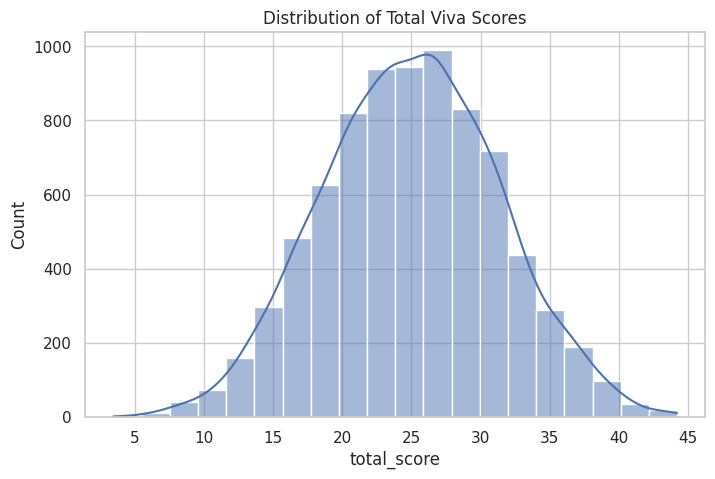

In [4]:
sns.histplot(df["total_score"], bins=20, kde=True)
plt.title("Distribution of Total Viva Scores")
plt.show()


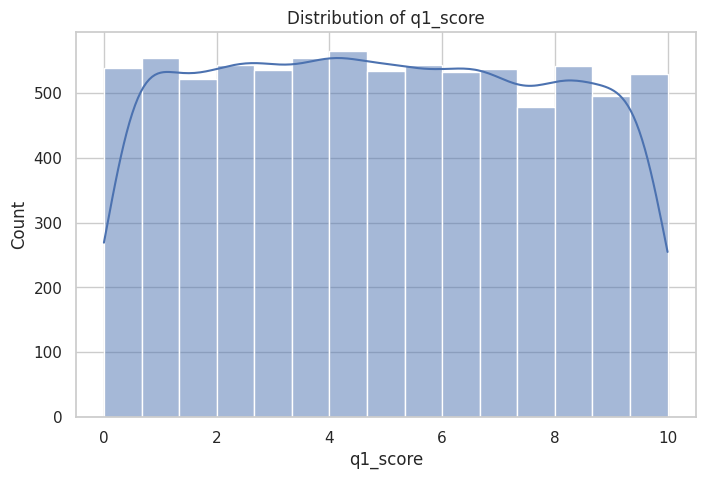

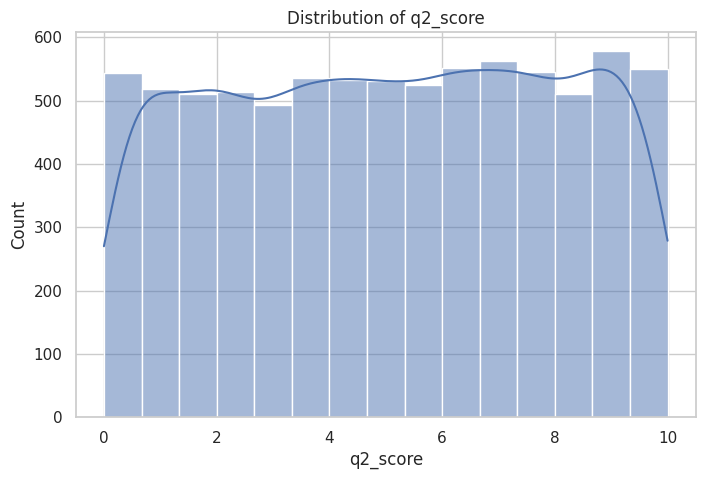

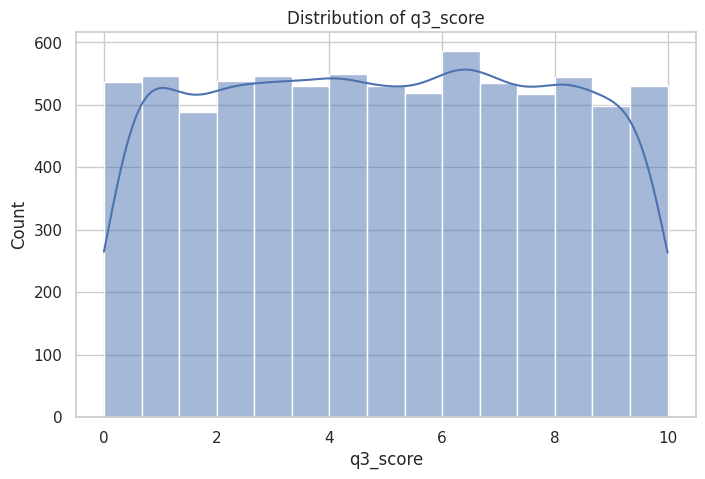

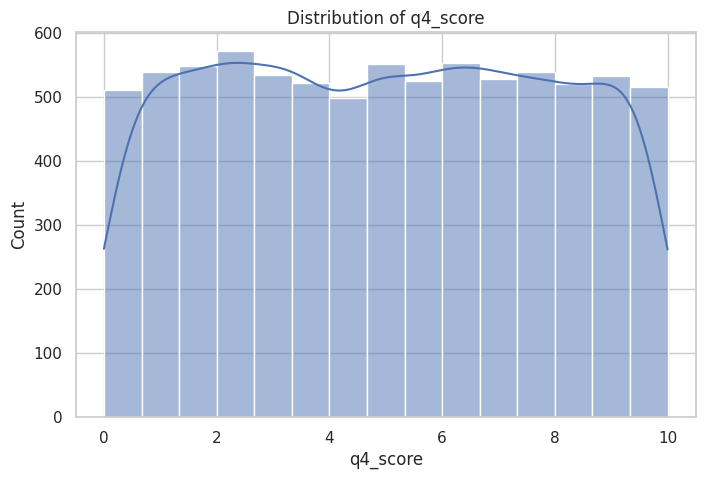

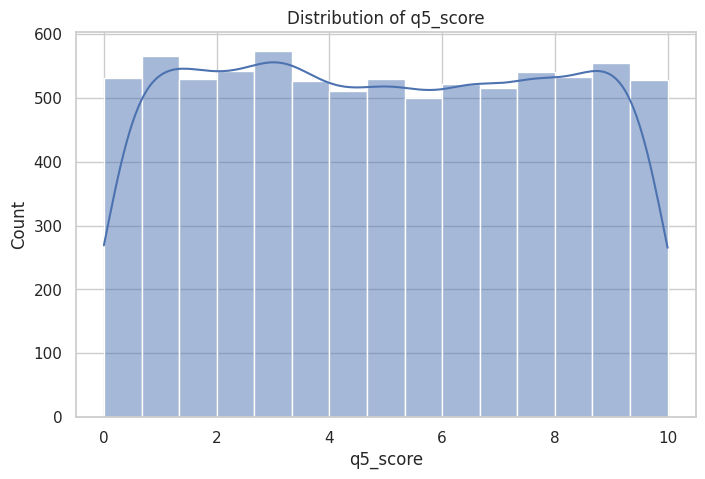

In [5]:
questions = ['q1_score','q2_score','q3_score','q4_score','q5_score']

for q in questions:
    sns.histplot(df[q], bins=15, kde=True)
    plt.title(f"Distribution of {q}")
    plt.show()


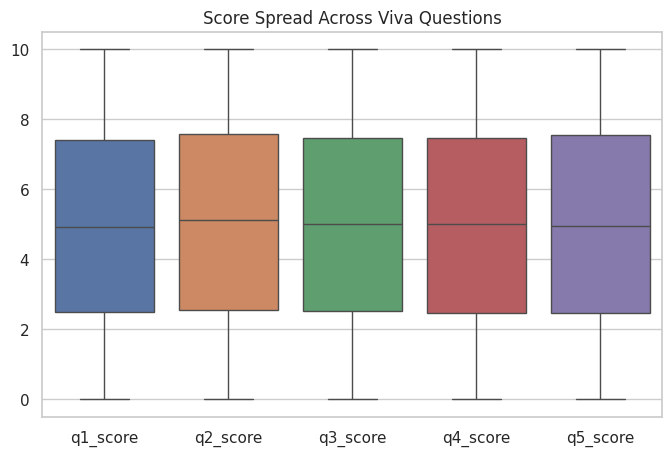

In [6]:
sns.boxplot(data=df[questions])
plt.title("Score Spread Across Viva Questions")
plt.show()


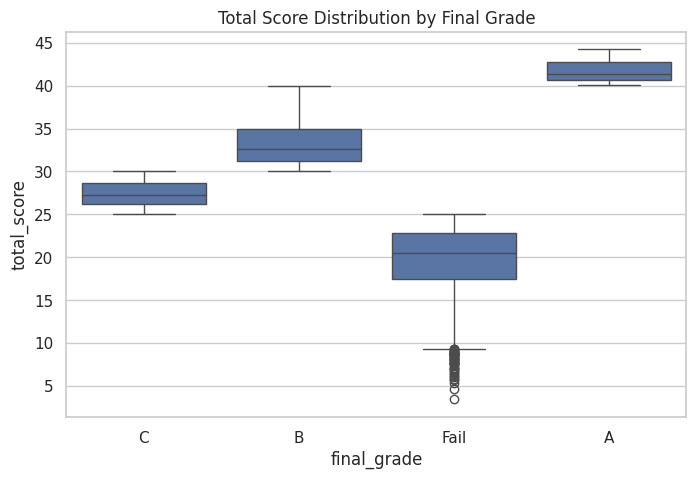

In [7]:
sns.boxplot(x="final_grade", y="total_score", data=df)
plt.title("Total Score Distribution by Final Grade")
plt.show()


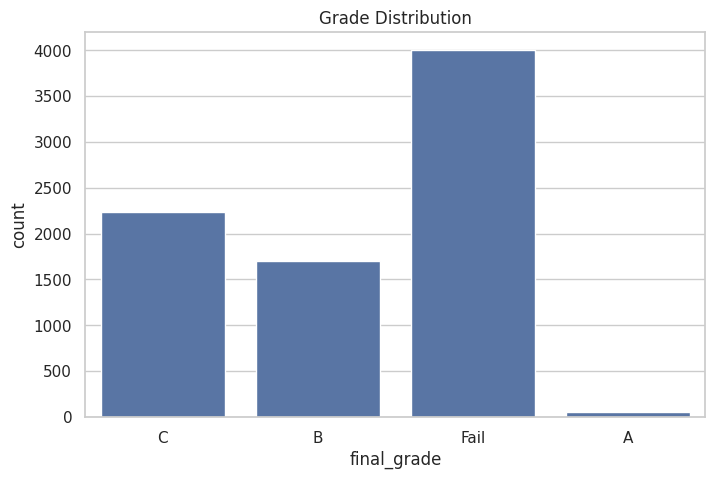

In [8]:
sns.countplot(x="final_grade", data=df)
plt.title("Grade Distribution")
plt.show()


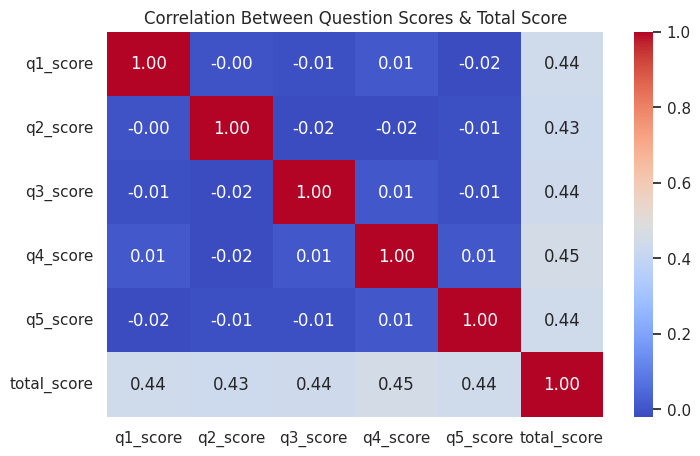

In [9]:
sns.heatmap(df[questions + ['total_score']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Question Scores & Total Score")
plt.show()


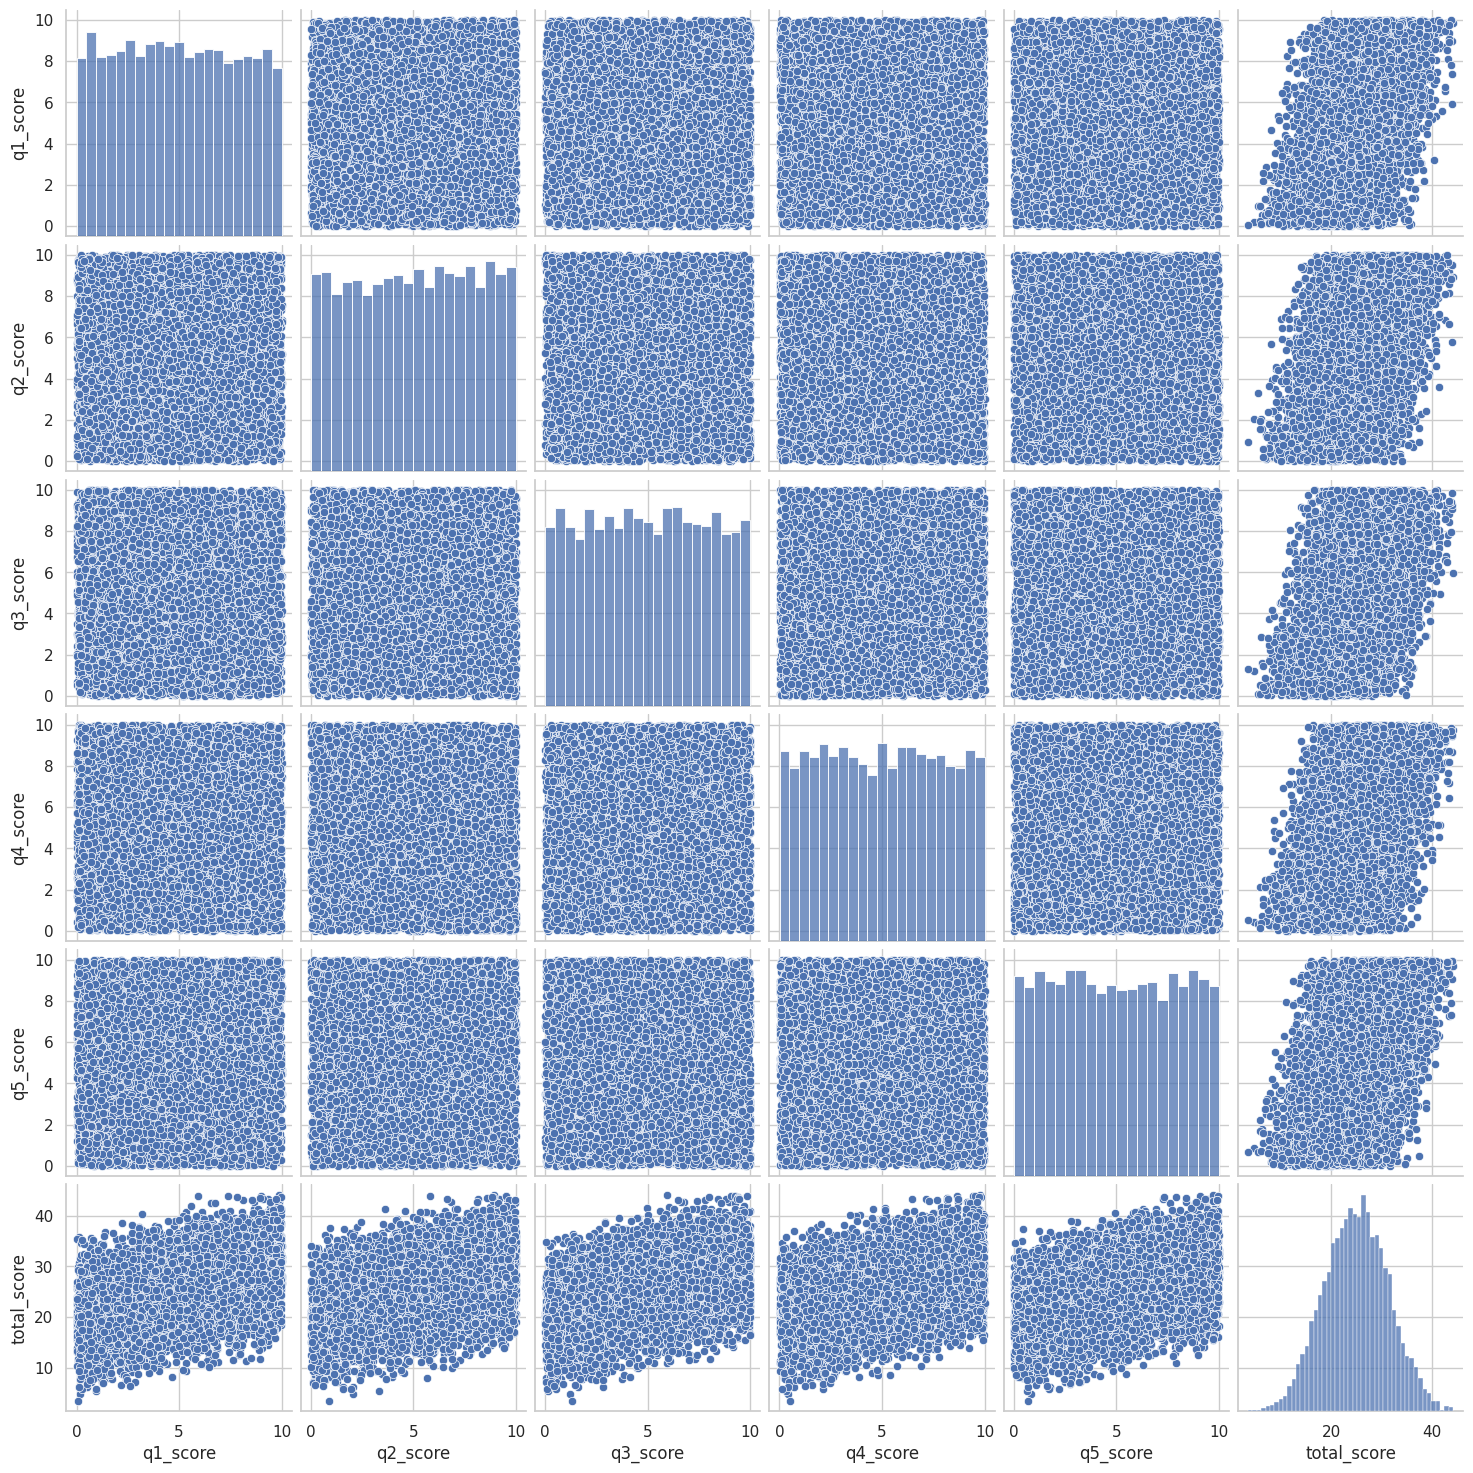

In [10]:
sns.pairplot(df[questions + ['total_score']])
plt.show()


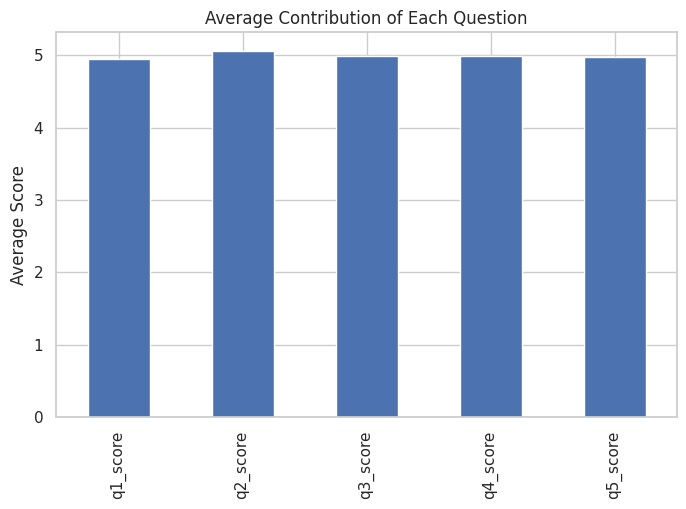

In [11]:
avg_scores = df[questions].mean()

avg_scores.plot(kind="bar")
plt.title("Average Contribution of Each Question")
plt.ylabel("Average Score")
plt.show()


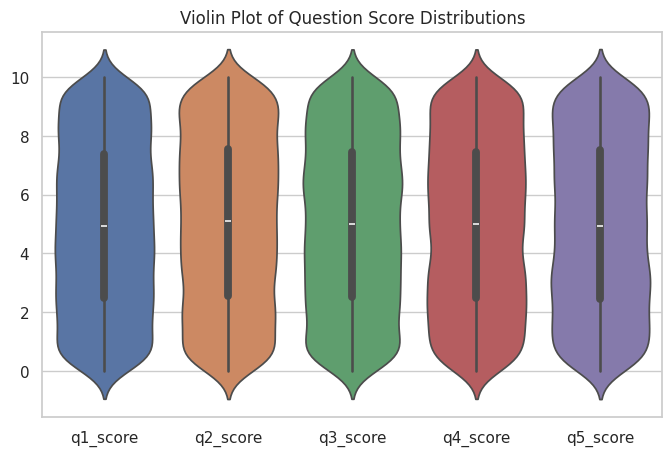

In [12]:
sns.violinplot(data=df[questions])
plt.title("Violin Plot of Question Score Distributions")
plt.show()


5. Feature Selection

In [18]:
X = df[['q1_score','q2_score','q3_score','q4_score','q5_score']]
y = df['total_score']

In [19]:
print("First 5 rows of X:")
display(X.head())
print("\nFirst 5 rows of y:")
display(y.head())

First 5 rows of X:


,q1_score,q2_score,q3_score,q4_score,q5_score
0,3.374770,0.968922,9.689485,5.793474,6.242745
1,7.755053,7.893796,1.951058,7.787626,4.795955
2,6.238958,2.088370,9.893550,5.692865,0.241025
3,0.355902,8.059056,1.282482,3.324825,7.037649
4,5.771171,9.419105,3.547509,8.456577,6.069714



First 5 rows of y:


,total_score
0,26.069395
1,30.183488
2,24.154769
3,20.059915
4,33.264077


6. Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

7. Model Training (Linear Regression)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

8. Model Evaluation

In [23]:
y_pred = model.predict(X_test)

In [24]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 3.0997426847534373e-15
MSE: 1.7910100776911546e-29
RMSE: 4.2320327003594324e-15
R² Score: 1.0


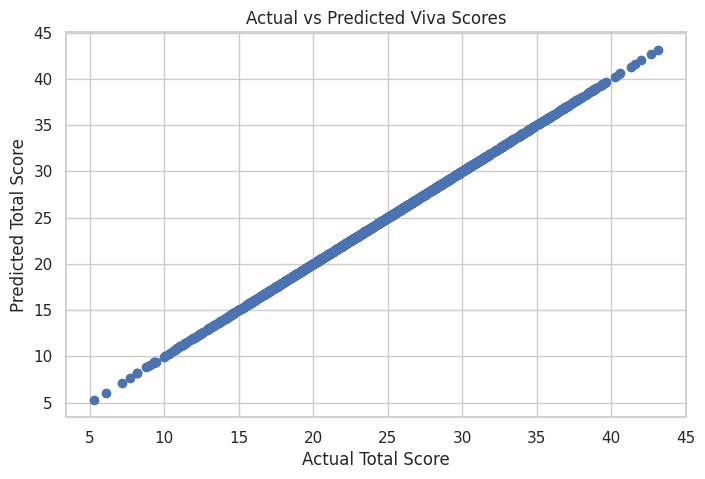

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs Predicted Viva Scores")
plt.show()

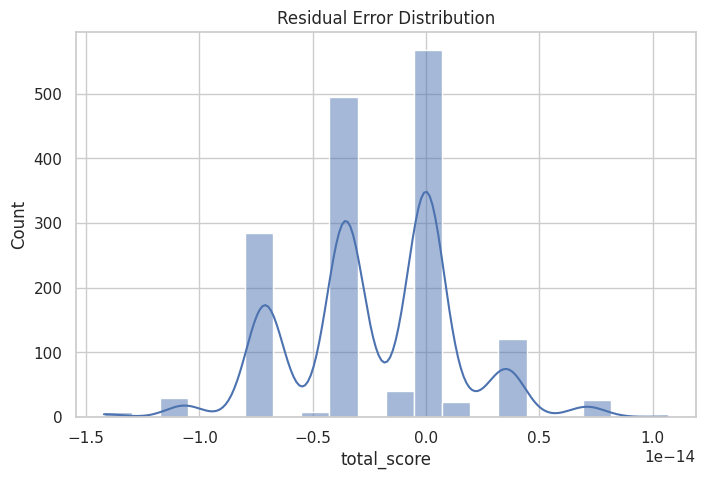

In [26]:
residuals = y_test - y_pred

sns.histplot(residuals, bins=20, kde=True)
plt.title("Residual Error Distribution")
plt.show()

9. Grade Prediction Function

In [27]:
def assign_grade(score):
    if score >= 40:
        return "A"
    elif score >= 30:
        return "B"
    elif score >= 25:
        return "C"
    else:
        return "Fail"

10. Test Dataset Prediction (Final Output)

In [28]:
# Load test dataset
test_df = pd.read_csv("viva_test_dataset.csv")

# Predict total score
test_df["predicted_total_score"] = model.predict(test_df)

# Predict grade
test_df["predicted_grade"] = test_df["predicted_total_score"].apply(assign_grade)

test_df.head()

,q1_score,q2_score,q3_score,q4_score,q5_score,predicted_total_score,predicted_grade
0,9.507143,3.329121,1.845120,4.592925,0.948178,20.222486,Fail
1,1.560186,4.766242,4.820893,5.878564,2.036533,19.062419,Fail
2,1.559945,8.657010,7.385710,7.002100,2.422618,27.027384,C
3,7.080726,7.594866,2.303442,3.032015,3.088792,23.099840,Fail
4,9.699099,7.290337,0.328627,8.956271,5.531397,31.805732,B


11. Save Predictions

In [29]:
test_df.to_csv("viva_predictions.csv", index=False)

12. Save Predictions as Pickle

In [30]:
test_df.to_pickle("viva_predictions.pkl")